In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/case-combined/merged_subjects_data.csv


In [17]:
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')

In [18]:
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


# Pre-processing steps

In [19]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [20]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [21]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


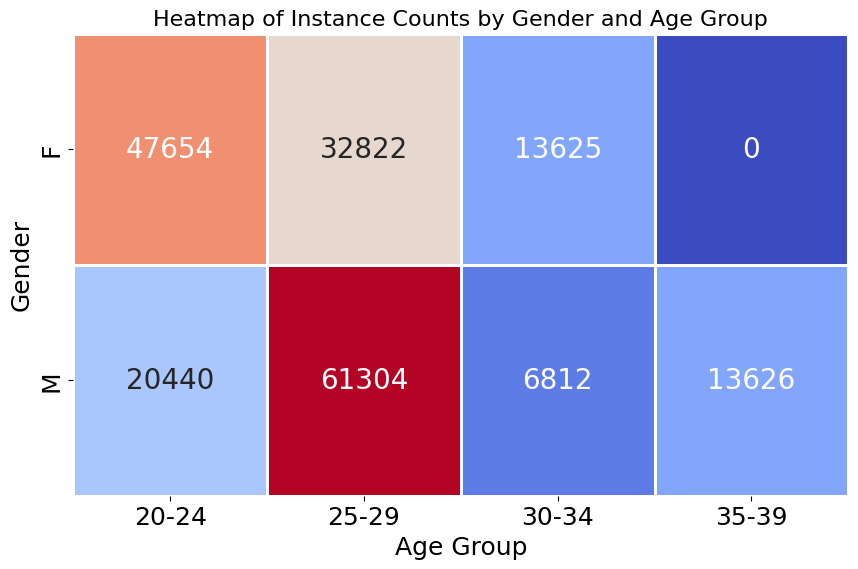


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

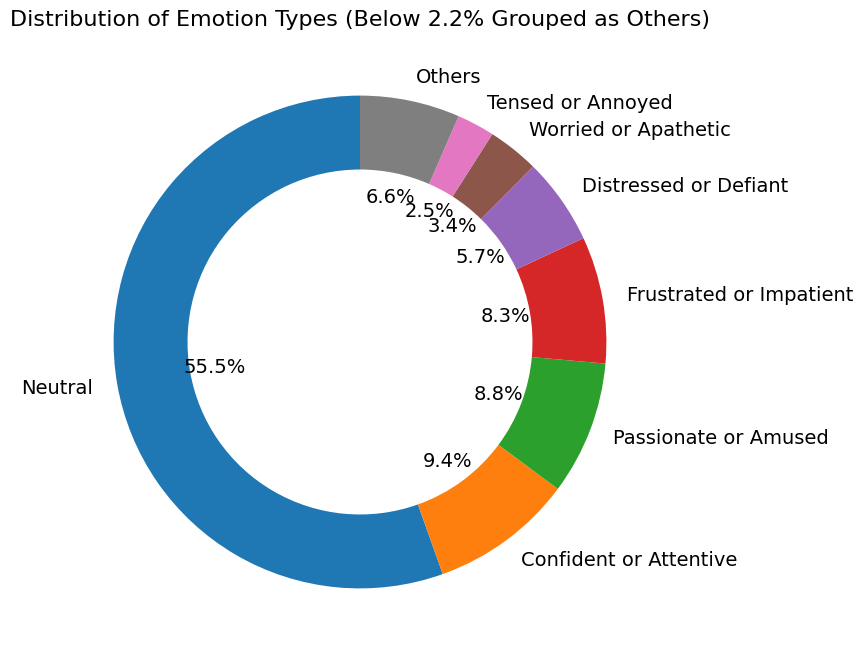


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

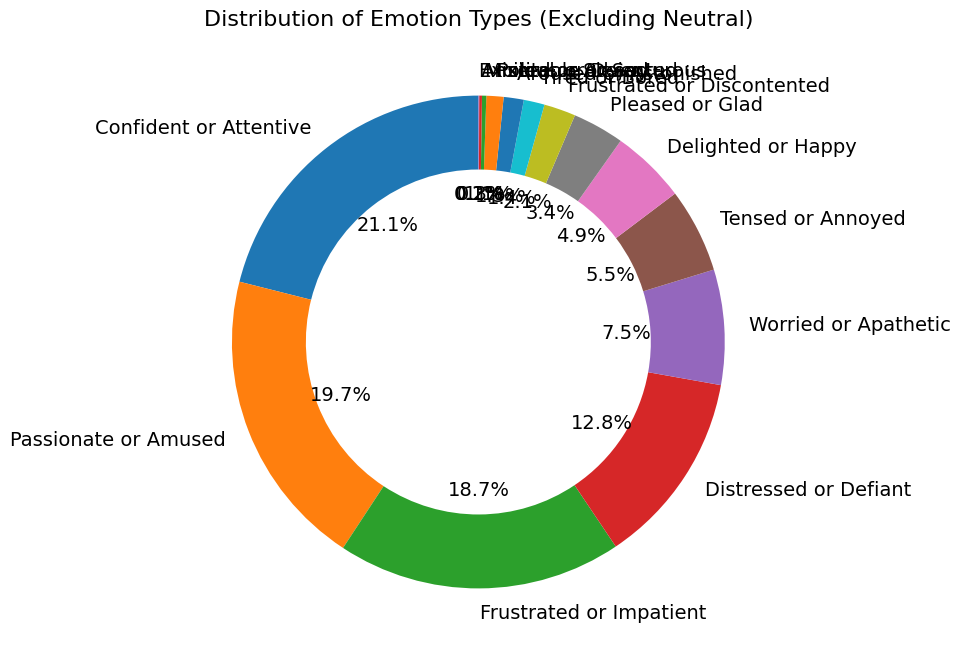


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


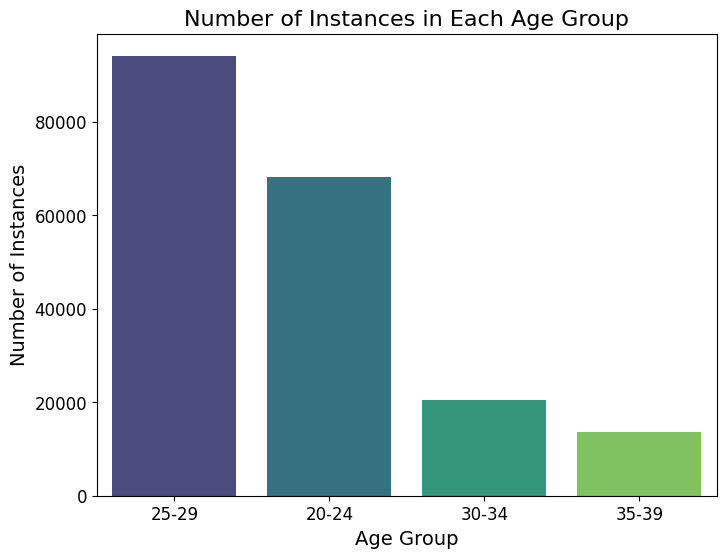


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


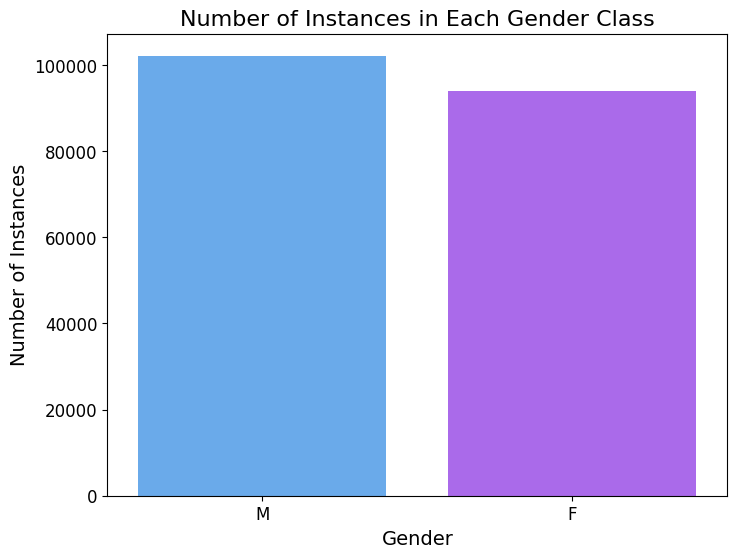

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 3629

Old Emotion Class Distribution (excluding neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished        

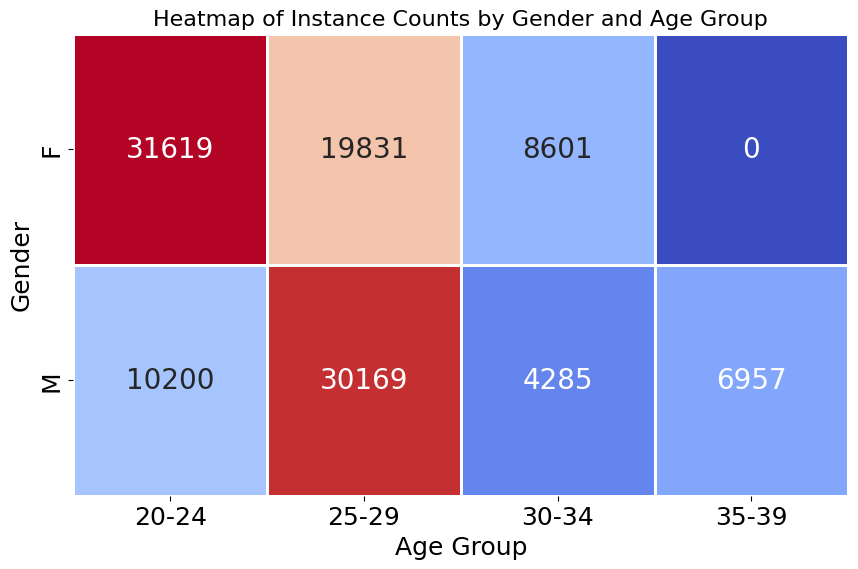


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Frustrated or Discontented     3800
Aroused or Astonished          3732
Polite or Sleepy               3702
Anxious or Dejected            3647
Excited or Adventurous         3634
Neutral                        3629
Miserable or Sad               3614
Tired or Bored                 3595
Pleased or Glad                3562
Name: count, dtype: int64
Total Instances in Emotion Distribution: 111787
Percentages for each class:
Emotion
Confident or Attentive        16.475977
Passionate or Amused          15.397139
Frustrated or Impatient       14.603666
Distressed or Defiant          9.996690
Worried or Apathetic           5.904980
Tensed or Annoyed              4.334135
Delighted or Happy             

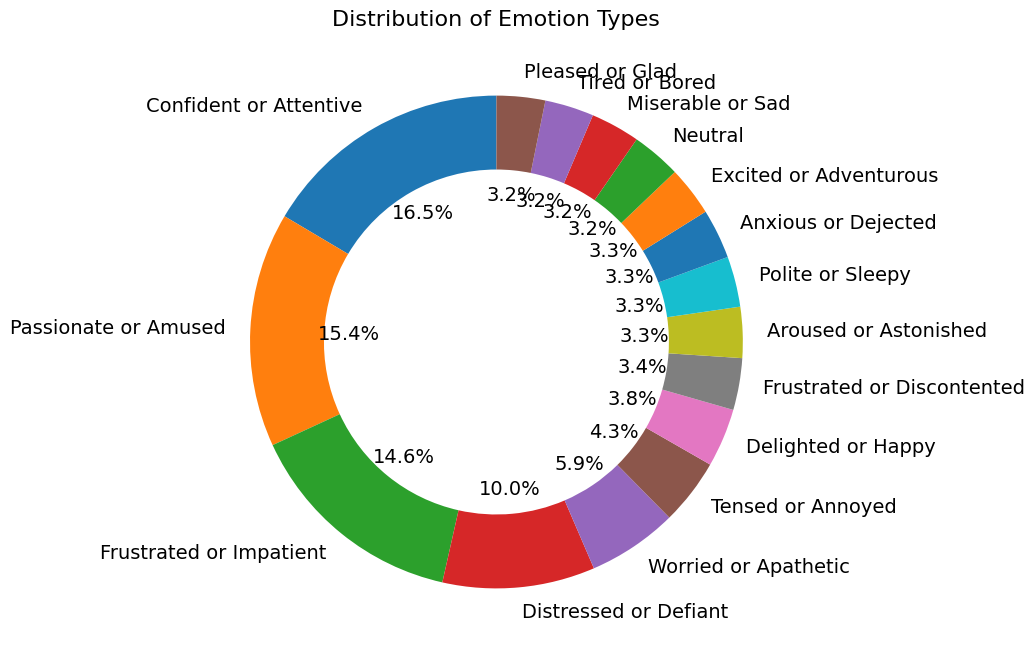


Age Group Distribution Information:
AGE
25-29    50002
20-24    41828
30-34    12886
35-39     6957
Name: count, dtype: int64
Total Instances in Age Group Distribution: 111673

Old vs New Age Group Counts (excluding Neutral):
25-29: Old=94126, New=50002, Difference=-44124
20-24: Old=68094, New=41828, Difference=-26266
30-34: Old=20437, New=12886, Difference=-7551
35-39: Old=13626, New=6957, Difference=-6669


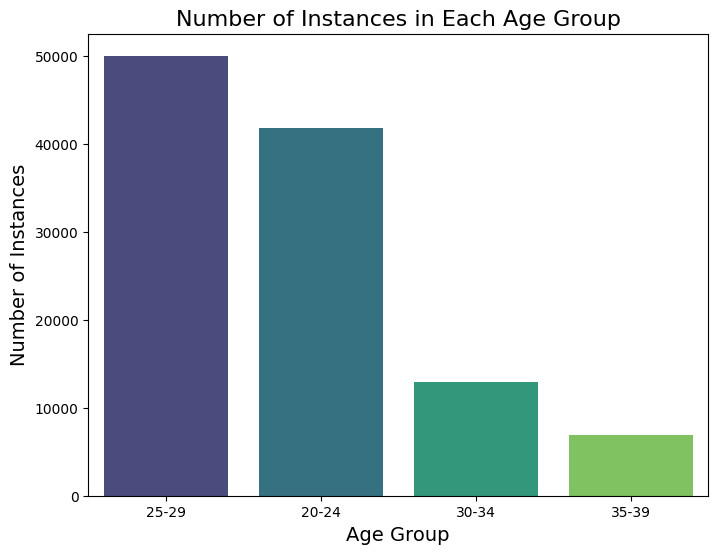


Gender Distribution Information:
GENDER
F    60096
M    51611
Name: count, dtype: int64
Total Instances in Gender Distribution: 111707

Old vs New Gender Class Counts (excluding Neutral):
M: Old=102182, New=51611, Difference=-50571
F: Old=94101, New=60096, Difference=-34005


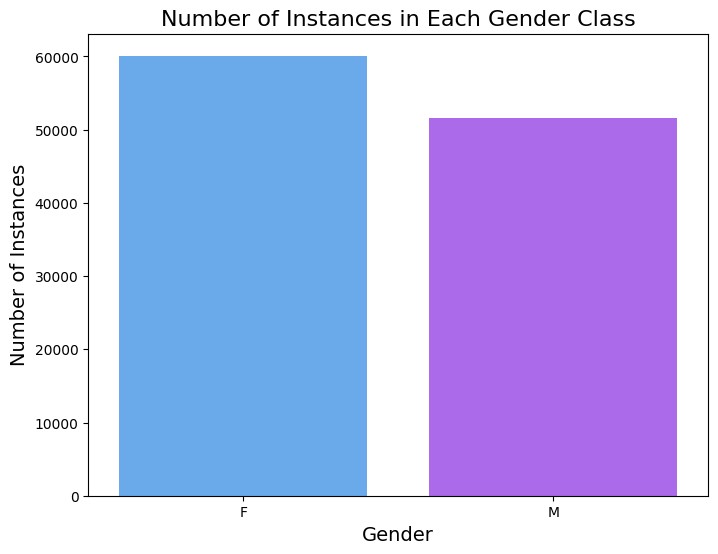

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    # Create a copy of the data to avoid modifying the original data
    df = data.copy()
    
    # Separate neutral emotion data from other emotions
    neutral_mask = df['Emotion'] == 'Neutral'
    df_neutral = df[neutral_mask]
    df_others = df[~neutral_mask]
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    # Print old number of instances per class (excluding neutral instances)
    print("\nOld Emotion Class Distribution (excluding neutral):")
    emotion_counts_excluding_neutral = emotion_counts.drop('Neutral', errors='ignore')
    print(emotion_counts_excluding_neutral)
    print(f"Total Instances before balancing: {emotion_counts_excluding_neutral.sum()}")

    # Undersample neutral class to target size
    if len(df_neutral) > target_size:
        neutral_indices = np.random.choice(df_neutral.index, target_size, replace=False)
        df_neutral_balanced = df_neutral.loc[neutral_indices]
    else:
        df_neutral_balanced = df_neutral
    
    # Prepare the data for resampling
    df_combined = pd.concat([df_neutral_balanced, df_others])
    X = df_combined.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df_combined['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        # Print new number of instances after balancing
        print("\nNew Emotion Class Distribution (after ADASYN or SMOTE):")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    # 1. Heatmap for Gender and Age Distribution
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data
    
    # Print differences (excluding neutral)
    old_heatmap_data = old_data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    old_heatmap_data_excluding_neutral = old_heatmap_data.drop('Neutral', errors='ignore')
    print("\nOld vs New Heatmap Data (excluding Neutral):")
    print(old_heatmap_data_excluding_neutral.sum().sum(), " (Old) vs", heatmap_data.sum().sum(), " (New)")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

    # 2. Donut Chart for Emotion Distribution
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")  # Total instances in emotion data
    print("Percentages for each class:")
    print(emotion_percentages)
    
    # Print the difference in Emotion Classes (excluding Neutral)
    old_emotion_counts = old_data['Emotion'].value_counts()
    old_emotion_counts_excluding_neutral = old_emotion_counts.drop('Neutral', errors='ignore')
    print(f"Old Emotion Instances (excluding Neutral): {old_emotion_counts_excluding_neutral}")
    
    # Ignore neutral instances in old data count for diff calculation
    print("\nOld vs New Emotion Class Counts (excluding Neutral):")
    for emotion in old_emotion_counts_excluding_neutral.index:
        old_count = old_emotion_counts_excluding_neutral[emotion]
        new_count = emotion_counts.get(emotion, 0)
        diff = new_count - old_count
        print(f"{emotion}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()

    # 3. Bar Plot for Age Group Distribution
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")  # Total instances in age groups
    
    # Print differences in age groups (excluding neutral)
    old_age_counts = old_data['AGE'].value_counts()
    old_age_counts_excluding_neutral = old_age_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Age Group Counts (excluding Neutral):")
    for age_group in old_age_counts_excluding_neutral.index:
        old_count = old_age_counts_excluding_neutral[age_group]
        new_count = age_counts.get(age_group, 0)
        diff = new_count - old_count
        print(f"{age_group}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=age_counts.index,
        y=age_counts.values,
        palette='viridis'
    )
    plt.title('Number of Instances in Each Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

    # 4. Bar Plot for Gender Distribution
    print("\nGender Distribution Information:")
    gender_counts = data['GENDER'].value_counts()
    print(gender_counts)
    print(f"Total Instances in Gender Distribution: {gender_counts.sum()}")  # Total instances in gender classes
    
    # Print differences in gender classes (excluding neutral)
    old_gender_counts = old_data['GENDER'].value_counts()
    old_gender_counts_excluding_neutral = old_gender_counts.drop('Neutral', errors='ignore')
    print("\nOld vs New Gender Class Counts (excluding Neutral):")
    for gender in old_gender_counts_excluding_neutral.index:
        old_count = old_gender_counts_excluding_neutral[gender]
        new_count = gender_counts.get(gender, 0)
        diff = new_count - old_count
        print(f"{gender}: Old={old_count}, New={new_count}, Difference={diff}")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=gender_counts.index,
        y=gender_counts.values,
        palette='cool'
    )
    plt.title('Number of Instances in Each Gender Class', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.show()

# Example workflow (replace 'data' with your dataset)
# data = pd.read_csv("your_dataset.csv")
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)


In [90]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from imblearn.over_sampling import ADASYN
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter
# from sklearn.impute import SimpleImputer

# def balance_emotion_data(data):
#     # Create a copy to avoid modifying original data
#     df = data.copy()
    
#     # Separate neutral from other emotions
#     neutral_mask = df['Emotion'] == 'Neutral'
#     df_neutral = df[neutral_mask]
#     df_others = df[~neutral_mask]
    
#     # Undersample neutral class
#     target_neutral_size = len(df_others) // 2  # Reduce neutral to half of other samples
#     neutral_indices = np.random.choice(df_neutral.index, target_neutral_size, replace=False)
#     df_neutral_undersampled = df_neutral.loc[neutral_indices]
    
#     # Combine undersampled neutral with others
#     df_balanced = pd.concat([df_neutral_undersampled, df_others])
    
#     # Prepare the data for ADASYN
#     X = df_balanced.drop(['Emotion', 'Emotion_Type'], axis=1)
#     y = df_balanced['Emotion']
    
#     # Convert categorical variables to numeric
#     X['GENDER'] = pd.Categorical(X['GENDER']).codes
#     X['AGE'] = pd.Categorical(X['AGE']).codes
    
#     # Handle missing values in X
#     numeric_columns = X.select_dtypes(include=[np.number]).columns
#     imputer = SimpleImputer(strategy='mean')
#     X_imputed = X.copy()
#     X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
#     # Handle missing values in y if any
#     y = y.fillna(y.mode()[0])  # Fill missing values with mode
    
#     # Print class distribution before balancing
#     print("Class distribution before balancing:")
#     print(Counter(y))
    
#     # Apply ADASYN on clean data
#     try:
#         adasyn = ADASYN(random_state=42, n_neighbors=5)
#         X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
#         # Print class distribution after balancing
#         print("\nClass distribution after balancing:")
#         print(Counter(y_resampled))
        
#     except ValueError as e:
#         print(f"ADASYN failed with error: {str(e)}")
#         print("Falling back to SMOTE...")
#         from imblearn.over_sampling import SMOTE
#         smote = SMOTE(random_state=42)
#         X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
    
#     # Convert back to DataFrame
#     df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
#     df_resampled['Emotion'] = y_resampled
    
#     # Convert numeric back to categorical
#     gender_map = {0: 'F', 1: 'M'}
#     age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
#     df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
#     df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    
#     # Add back Emotion_Type
#     emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
#     df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
#     return df_resampled

# def create_visualizations(data):
#     # 1. Heatmap for Gender and Age Distribution
#     plt.figure(figsize=(10, 6))
#     heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
#     print("Gender and Age Distribution (Heatmap Data):")
#     print(heatmap_data)
    
#     sns.heatmap(
#         heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
#         annot_kws={"size": 20}
#     )
#     plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
#     plt.xlabel('Age Group', fontsize=18)
#     plt.ylabel('Gender', fontsize=18)
#     plt.xticks(fontsize=18)
#     plt.yticks(fontsize=18)
#     plt.show()

#     # 2. Donut Chart for Emotion Distribution
#     percentage_threshold = 2.2
#     emotion_counts = data['Emotion'].value_counts()
#     total_count = emotion_counts.sum()
#     emotion_percentages = (emotion_counts / total_count) * 100
    
#     print("\nEmotion Type Counts and Percentages:")
#     print(emotion_counts)
#     print(emotion_percentages)
    
#     emotion_counts_filtered = emotion_counts[emotion_percentages >= percentage_threshold]
#     others_count = emotion_counts[emotion_percentages < percentage_threshold].sum()
#     if others_count > 0:
#         emotion_counts_filtered["Others"] = others_count
    
#     plt.figure(figsize=(8, 8))
#     plt.pie(
#         emotion_counts_filtered, labels=emotion_counts_filtered.index, autopct='%1.1f%%',
#         startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
#     )
#     plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
#     plt.show()

#     # 3. Bar Plot for Age Group Distribution
#     plt.figure(figsize=(8, 6))
#     age_counts = data['AGE'].value_counts()
#     print("\nAge Group Distribution:")
#     print(age_counts)
    
#     sns.barplot(
#         x=age_counts.index,
#         y=age_counts.values,
#         palette='viridis'
#     )
#     plt.title('Number of Instances in Each Age Group', fontsize=16)
#     plt.xlabel('Age Group', fontsize=14)
#     plt.ylabel('Number of Instances', fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.show()

#     # 4. Bar Plot for Gender Distribution
#     plt.figure(figsize=(8, 6))
#     gender_counts = data['GENDER'].value_counts()
#     print("\nGender Distribution:")
#     print(gender_counts)
    
#     sns.barplot(
#         x=gender_counts.index,
#         y=gender_counts.values,
#         palette='cool'
#     )
#     plt.title('Number of Instances in Each Gender Class', fontsize=16)
#     plt.xlabel('Gender', fontsize=14)
#     plt.ylabel('Number of Instances', fontsize=14)
#     plt.xticks(fontsize=12)
#     plt.yticks(fontsize=12)
#     plt.show()

# def clean_data(data):
#     # Create a copy of the data
#     df = data.copy()
    
#     # Print initial info about missing values
#     print("Missing values before cleaning:")
#     print(df.isnull().sum())
    
#     # Drop rows with missing values in crucial columns
#     crucial_columns = ['Emotion', 'GENDER', 'AGE']
#     df = df.dropna(subset=crucial_columns)
    
#     # Print final info about missing values
#     print("\nMissing values after cleaning:")
#     print(df.isnull().sum())
    
#     return df

# # Apply the cleaning, balancing and create visualizations
# cleaned_data = clean_data(data)
# balanced_data = balance_emotion_data(cleaned_data)
# create_visualizations(balanced_data)

In [59]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


In [44]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.


# sample lol

In [45]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.
